Salida de la fuente: [0 0 1 1 0 1 0 0 0 0 0 0 0 1 0]
Salida mapeada: [-1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1]


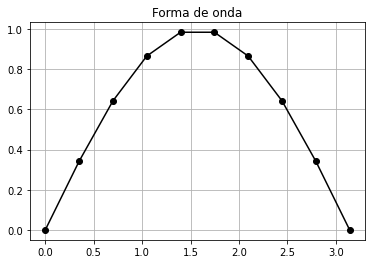

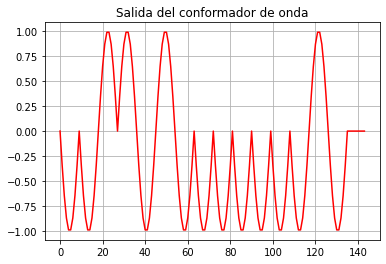

In [23]:
import matplotlib.pyplot as plt
import numpy as np

#Fuente.
cantidadMuestras = 15       #Cantidad de símbolos a enviar.
probabilidades = [0.6, 0.4] #70% de probabilidad de tener un '0', 30% de probabilidad de tener un '1'.
simbolos = [0, 1]           #Símbolos a enviar.
baseOrtonormal = [-1, 1]    #Base ortonormal utilizada para el mapeo.

#Generación de mensajes.
mensaje = np.random.choice(simbolos, cantidadMuestras, p = probabilidades)

print("Salida de la fuente:", mensaje)

#Mapeo: 0 > -1; 1 > 1.
for i in range(len(mensaje)):
    if (mensaje[i] == 0):
      mensaje[i] = baseOrtonormal[0]
    else:
      mensaje[i] = baseOrtonormal[1]

print("Salida mapeada:", mensaje)

#Sobremuestreo.
N = 9 # Factor de sobremuestreo. Debe ser igual a la cantidad de muestras de la señal utilizada, menos uno.

sobremuestreo = np.vstack((mensaje, np.zeros((N - 1, mensaje.size)))) #Hacemos vstack con un arreglo de ceros para 'darle tiempo' a la convolución
                                                                      #para que la señal utilizada pueda entrar en el intervalo de tiempo empleado
                                                                      #para enviar un mensaje.
sobremuestreo = np.reshape(sobremuestreo, -1, order='F')

#Conformador de onda senoidal.
x = np.linspace(0, np.pi, 10) #Utilizamos medio seno (tomamos 10 muestras entre 0 y PI de la función seno).
waveform = np.sin(x)

plt.plot(x, waveform, color = 'black', marker = "o")  
plt.title("Forma de onda")
plt.grid()
plt.show()  

#Se hace la convolucion entre los símbolos espaciados por ceros y la forma de onda elegida para observar el comportamiento del conformador de onda.
wt = np.convolve(sobremuestreo, waveform)
tt = np.arange(np.round(cantidadMuestras * N) + 9)

plt.plot(tt, wt, color = 'red')
plt.title("Salida del conformador de onda")
plt.grid()
plt.show()